In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from pybrain.tools.shortcuts import buildNetwork
from pybrain.tools.shortcuts import SigmoidLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

In [16]:
avr_train_ds=SupervisedDataSet.loadFromFile('avr_train_ds')
avr_test_ds=SupervisedDataSet.loadFromFile('avr_test_ds')
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds')

In [ ]:
avr_nets=[]
avr_err=[]
small_nets=[]
small_err=[]
for k in range(101,201):
    print k
    avr_net=buildNetwork(588,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_net=buildNetwork(576,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    avr_trainer=BackpropTrainer(avr_net,avr_train_ds)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    avr_err.append(avr_trainer.trainUntilConvergence(maxEpochs=500,continueEpochs=10,validationProportion=1/3.0))
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=500,continueEpochs=10,validationProportion=1/3.0))
    avr_nets.append(avr_net)
    small_nets.append(small_net)

In [26]:
min_avr_err=[]
min_small_err=[]

In [27]:
for e in avr_err:
    min_avr_err.append(min(e[1]))
for e in small_err:
    min_small_err.append(min(e[1]))    
avr_idx=min_avr_err.index(min(min_avr_err))
small_idx=min_small_err.index(min(min_small_err))

In [32]:
avr_idx

32

In [31]:
small_idx

73

In [5]:
plt.plot(min_avr_err)
print (min_avr_err[avr_idx])

NameError: name 'min_avr_err' is not defined

0.0295345766849


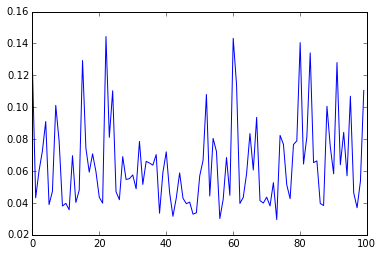

In [36]:
plt.plot(min_small_err)
print (min_small_err[small_idx])

In [7]:
def get_err_in_percent(net,ds):
    h=net.activateOnDataset(ds)
    return 100-sum(h.argmax(axis=1)==ds['target'].argmax(axis=1))/float(ds['target'].shape[0])*100

In [40]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

9.6666666666666714

In [39]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

13.0

In [41]:
small_best_net=small_nets[small_idx]

In [140]:
h_train=small_best_net.activateOnDataset(small_train_ds)

In [146]:
h_test=small_best_net.activateOnDataset(small_test_ds)

In [141]:
h_train_list=[]
for i in range(h_train.shape[0]):
    h_train_list.append(np.where(h_train[i]==max(h_train[i]),1,0))

In [147]:
h_test_list=[]
for i in range(h_test.shape[0]):
    h_test_list.append(np.where(h_test[i]==max(h_test[i]),1,0))

In [142]:
h_train_arr=np.array(h_train_list)

In [148]:
h_test_arr=np.array(h_test_list)

In [92]:
np.set_printoptions(threshold=np.nan)

In [106]:
small_train_ds['input'].shape

(300L, 576L)

In [143]:
small_train_pics=small_train_ds['input'].reshape(small_train_ds['input'].shape[0],16,12,3)

In [176]:
small_test_pics=small_test_ds['input'].reshape(small_test_ds['input'].shape[0],12,16,3)

In [125]:
def show(image):
    plt.imshow(image,interpolation='none')
    plt.show()

[0 1 0 0] [1 0 0 0]


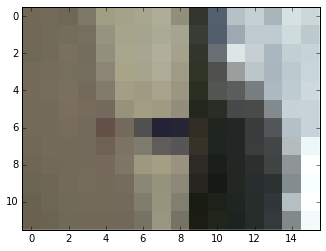

In [177]:
print small_test_ds['target'][6], h_test_arr[6]
show(256-small_test_pics[6])

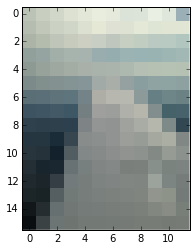

In [135]:
show(np.rot90(255-small_pics[3],2))

In [151]:
h_test_arr-small_test_ds['target']

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  1, -1],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [-1,  1,  0,  0],
       [ 1, -1,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 1, -1,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 1, -1,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0, -1,  1],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 1, -1,  0,  0],
       [ 0,  0,  0,  0],


In [178]:
#best small net is 576, 174, 4
#best avr net is 588, 47, 4

In [4]:
np.save('min_avr_err_101_200.npy', min_avr_err)
np.save('min_small_err_101_200', min_small_err)

NameError: name 'min_avr_err' is not defined

In [3]:
help(np.save)

Help on function save in module numpy.lib.npyio:

save(file, arr)
    Save an array to a binary file in NumPy ``.npy`` format.
    
    Parameters
    ----------
    file : file or str
        File or filename to which the data is saved.  If file is a file-object,
        then the filename is unchanged.  If file is a string, a ``.npy``
        extension will be appended to the file name if it does not already
        have one.
    arr : array_like
        Array data to be saved.
    
    See Also
    --------
    savez : Save several arrays into a ``.npz`` archive
    savetxt, load
    
    Notes
    -----
    For a description of the ``.npy`` format, see `format`.
    
    Examples
    --------
    >>> from tempfile import TemporaryFile
    >>> outfile = TemporaryFile()
    
    >>> x = np.arange(10)
    >>> np.save(outfile, x)
    
    >>> outfile.seek(0) # Only needed here to simulate closing & reopening file
    >>> np.load(outfile)
    array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])



In [8]:
show(avr_images[28])

NameError: name 'avr_images' is not defined

In [7]:
def show(image):
    plt.imshow(image,cmap=plt.cm.gray,interpolation='none')
    plt.show()

In [10]:
small_test_ds=SupervisedDataSet.loadFromFile('small_test_ds_2X2X3')
small_train_ds=SupervisedDataSet.loadFromFile('small_train_ds_2X2X3')

In [4]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(51,76):
    print k
    small_net=buildNetwork(12,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


11 0.0388465927703


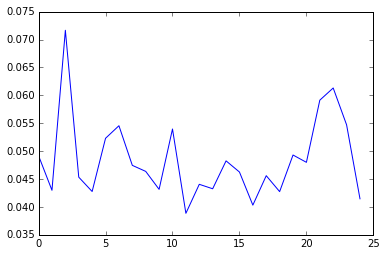

In [5]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [8]:
small_train_result=get_err_in_percent(small_nets[small_idx],small_train_ds)
small_train_result

27.0

In [11]:
small_test_result=get_err_in_percent(small_nets[small_idx],small_test_ds)
small_test_result

32.0

In [2]:
small_train_ds=SupervisedDataSet.loadFromFile('small_train_differences_ds_2X2X3+12X3')
small_test_ds=SupervisedDataSet.loadFromFile('small_test_differences_ds_2X2X3+12X3')

In [4]:
small_nets=[]
small_err=[]
min_small_err=[]
for k in range(51,101):
    print k
    small_net=buildNetwork(48,k,4,bias=True,hiddenclass=SigmoidLayer,outclass=SigmoidLayer)
    small_trainer=BackpropTrainer(small_net,small_train_ds)
    small_err.append(small_trainer.trainUntilConvergence(maxEpochs=5000,continueEpochs=500,validationProportion=1/3.0))
    small_nets.append(small_net)

for e in small_err:
    min_small_err.append(min(e[1]))    
small_idx=min_small_err.index(min(min_small_err))

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


14 0.0292335812511


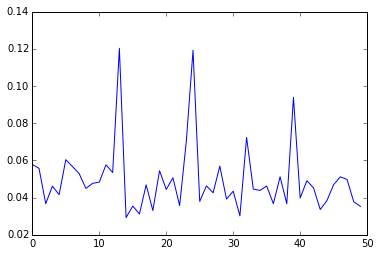

In [5]:
plt.plot(min_small_err)
print small_idx,(min_small_err[small_idx])

In [29]:
small_train_result=get_err_in_percent(small_nets[16],small_train_ds)
small_train_result

10.333333333333343

In [30]:
small_test_result=get_err_in_percent(small_nets[16],small_test_ds)
small_test_result

12.0

In [34]:
small_net=small_nets[31]

In [35]:
import pickle

In [36]:
f=open('small_net_2X2X3+12X3_v3.net', 'w')
pickle.dump(small_net,f)
f.close()